In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynamic_drone import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from simulations import simulation, plot_pretty


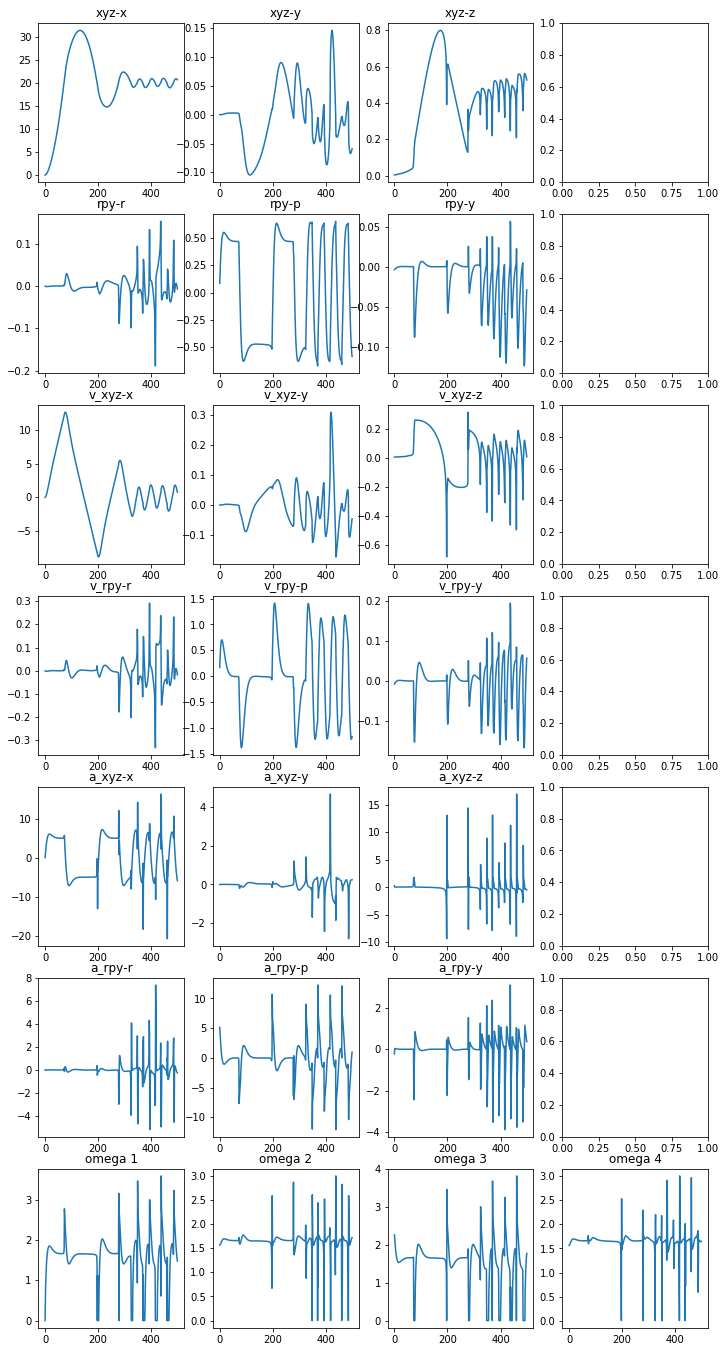

In [5]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 1.0001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

'''
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10
'''

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 1.0, C=1.0, alpha=0.5):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = C*(t_xyz - xyz)
    
    norm_b = np.sum((xyz - b_xyz)**2)
    norm_g = np.sum((xyz - g_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    g_direc = (xyz - g_xyz)/sigma*np.exp(-norm_g/2/sigma)
    direc = b_direc + o_direc + g_direc
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=500)
plot_pretty(res)

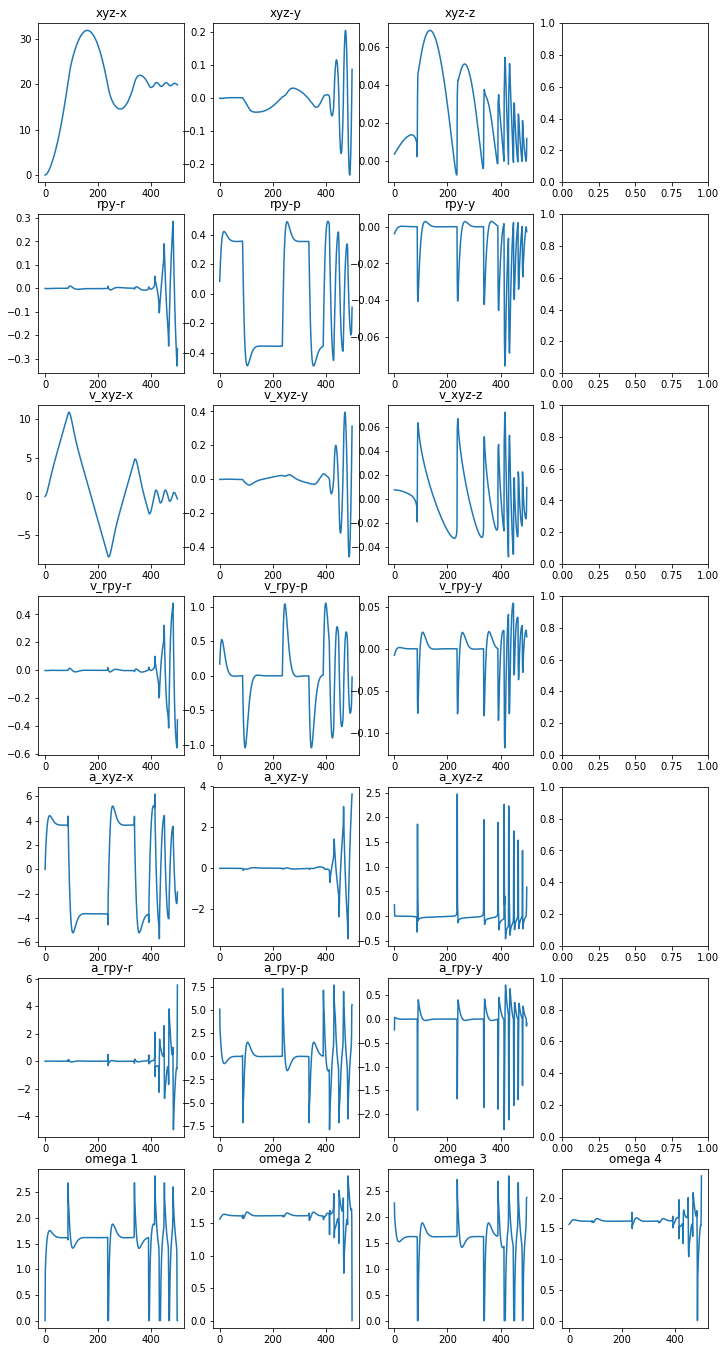

In [6]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.1001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

'''
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10
'''

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 2.0, C_o=2.0, C_g=0.1, sigma_g=1.0, alpha=0.5):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    
    norm_b = np.sum((xyz - b_xyz)**2)
    norm_g = np.sum((xyz - g_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    direc = b_direc + C_o * o_direc + C_g * g_direc
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=500)
plot_pretty(res)

begin [-1.92874985e-21  0.00000000e+00  0.00000000e+00] [20.  0.  0.] [0.        0.        0.0099995]
begin [-1.92873602e-21  0.00000000e+00  7.30419216e-25] [ 2.0000000e+01  0.0000000e+00 -3.7870357e-03] [0.         0.         0.01378573]
begin [-2.21503199e-21 -1.17390104e-26  8.93446361e-25] [ 1.99860099e+01  5.29228808e-05 -4.02791665e-03] [0.         0.         0.01402654]
begin [-2.80696100e-21 -2.71505790e-26  1.20352225e-24] [ 1.99620235e+01  9.63585545e-05 -4.27135143e-03] [0.        0.        0.0142699]
begin [-3.91002875e-21 -5.03329651e-26  1.77754736e-24] [ 1.99283561e+01  1.27805607e-04 -4.51355327e-03] [0.         0.         0.01451202]
begin [-5.96146250e-21 -8.77690186e-26  2.86723873e-24] [ 1.98853440e+01  1.45539277e-04 -4.75447781e-03] [0.         0.         0.01475287]
begin [-9.90190957e-21 -1.49628099e-25  5.02889843e-24] [ 1.98333439e+01  1.48592001e-04 -4.99407586e-03] [0.         0.         0.01499239]
begin [-1.78276692e-20 -2.49347159e-25  9.54489423e-24] [ 

begin [1.60616874e-05 7.60920704e-08 1.04535970e-07] [ 4.96933277 -0.02383273 -0.03274162] [0.        0.        0.0427026]
begin [1.18256604e-05 5.42343311e-08 7.40230847e-08] [ 4.90638734 -0.02336011 -0.03188363] [0.        0.        0.0418469]
begin [8.49922700e-06 3.76745797e-08 5.10680084e-08] [ 4.83941014 -0.02287538 -0.03100765] [0.         0.         0.04097318]
begin [5.95773835e-06 2.54845430e-08 3.42938661e-08] [ 4.76839729 -0.02237846 -0.03011409] [0.         0.         0.04008183]
begin [4.06947773e-06 1.67706946e-08 2.23949873e-08] [ 4.69334532 -0.02186922 -0.02920337] [0.         0.         0.03917326]
begin [2.70606079e-06 1.07260189e-08 1.42071866e-08] [ 4.61425116 -0.0213475  -0.02827591] [0.         0.         0.03824789]
begin [1.75002197e-06 6.66012873e-09 8.74618345e-09] [ 4.53111211 -0.02081317 -0.02733217] [0.         0.         0.03730616]
begin [1.09951477e-06 4.01053010e-09 5.21898591e-09] [ 4.4439258  -0.02026603 -0.02637261] [0.         0.         0.03634856

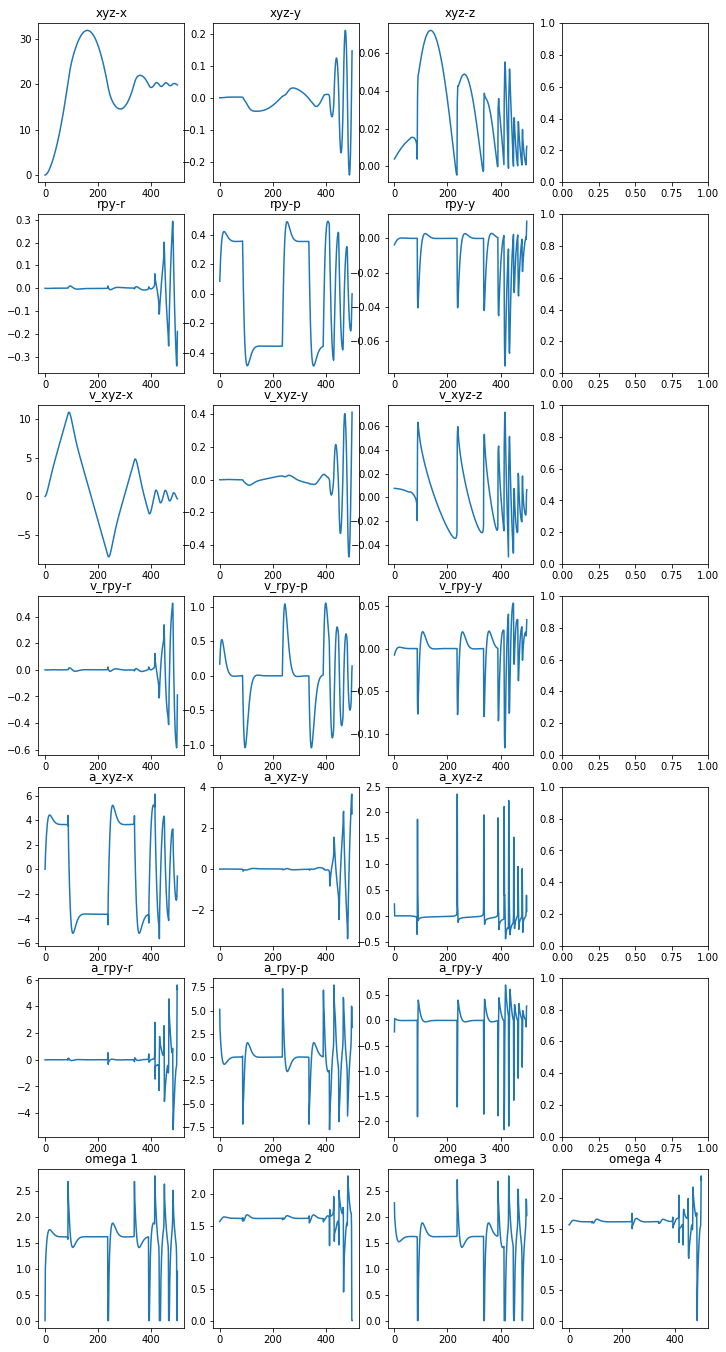

In [7]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.1001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

'''
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10
'''

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 1.0, C_o=1.0, C_g=0.1, sigma_g=1.0, alpha=0.5):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    
    norm_b = np.sum((xyz - b_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    norm_g = np.sum((xyz - g_xyz)**2)
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    direc = b_direc + C_o * o_direc + C_g * g_direc
    print("begin",b_direc, o_direc, g_direc)
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=500)
plot_pretty(res)

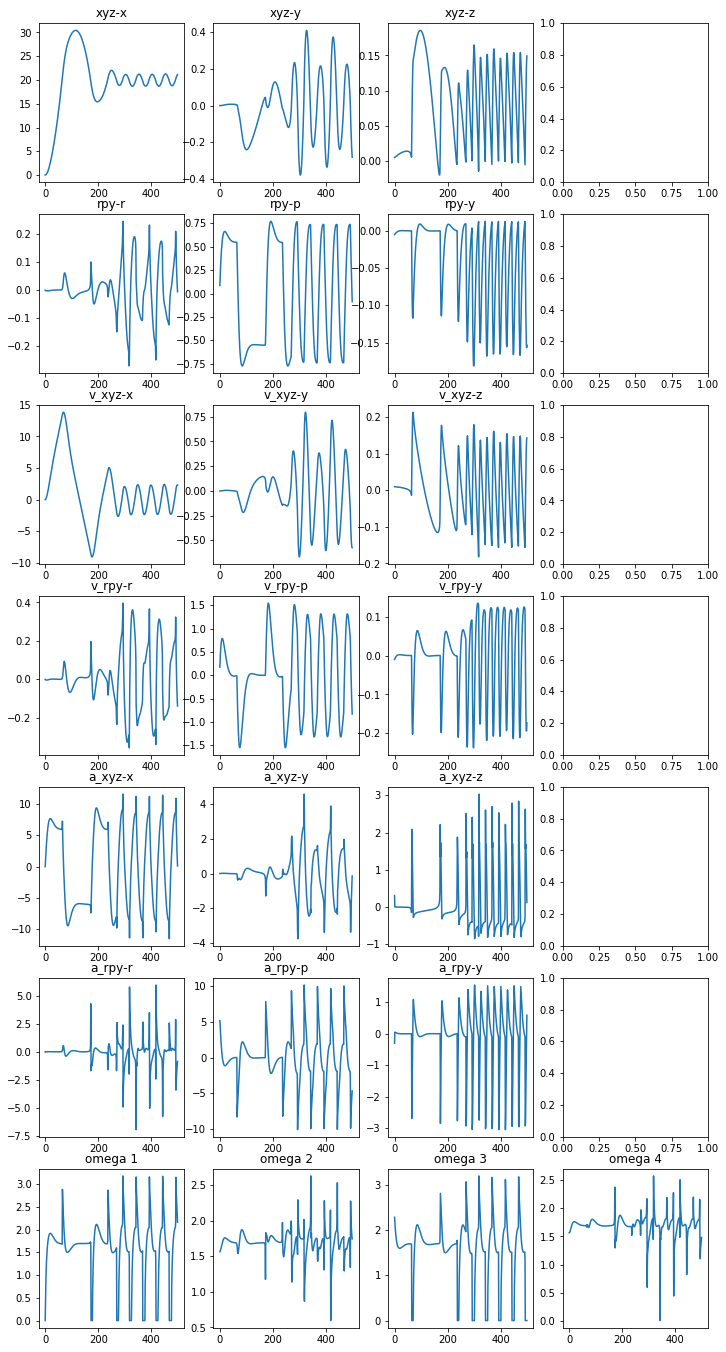

In [26]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.1001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 10., C_b=2.0, C_o=1.0, C_g=0.1, sigma_g=1.0, alpha=1.0):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    
    norm_b = np.sum((xyz - b_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    norm_g = np.sum((xyz - g_xyz)**2)
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    direc = C_b *b_direc + C_o * o_direc + C_g * g_direc
    #print("begin",b_direc, o_direc, g_direc)
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=length)
plot_pretty(res)

Text(0.5, 1.0, 'Varying Density')

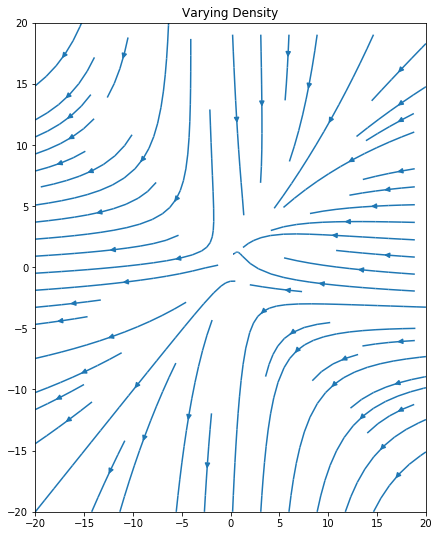

In [27]:
import matplotlib.gridspec as gridspec

w = 20
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
#ax0 = fig.add_subplot(gs[0, 0])
ax0 = fig.gca()
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')


In [28]:
Y.shape,X.shape

((100, 100), (100, 100))

In [29]:
U = np.zeros_like(Y)
V = np.zeros_like(Y)
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        xyz_target = xyz_target_arr(np.array([X[i,j], Y[i,j], 0.0]), np.zeros(3), np.zeros(3), np.zeros(3))
        U[i,j] = xyz_target[0]
        V[i,j] = xyz_target[1]


Text(0.5, 1.0, 'Varying Density')

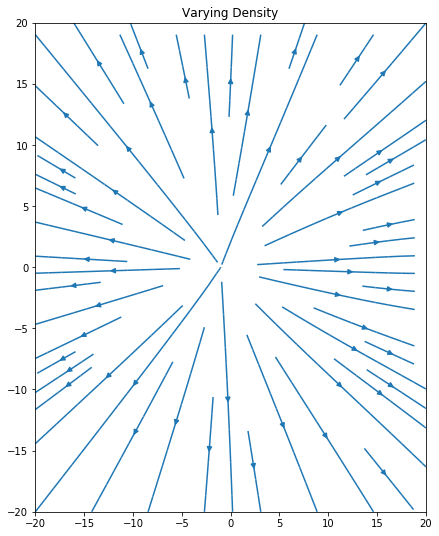

In [30]:
fig = plt.figure(figsize=(7, 9))
#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
#ax0 = fig.add_subplot(gs[0, 0])
ax0 = fig.gca()
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')


In [31]:
ax0.streamplot?

In [21]:
X[-1,-1]

20.0

In [37]:
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
U = np.zeros([Y.shape[0],X.shape[0]])
V = np.zeros([Y.shape[0],X.shape[0]])

for j,x in enumerate(X):
    for i,y in enumerate(Y):
        U[i,j] = -x
        V[i,j] = -y

Text(0.5, 1.0, 'Varying Density')

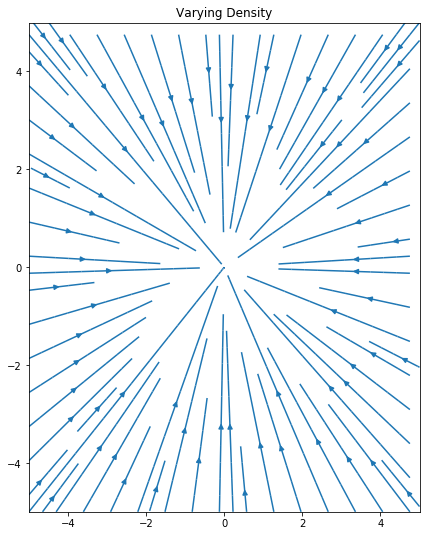

In [38]:
fig = plt.figure(figsize=(7, 9))
#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
#ax0 = fig.add_subplot(gs[0, 0])
ax0 = fig.gca()
ax0.streamplot(X, Y, U, V) #density=[0.5, 1])
ax0.set_title('Varying Density')


In [48]:
X = np.linspace(-1,21,200)
Y = np.linspace(-10,10,200)
U = np.zeros([Y.shape[0],X.shape[0]])
V = np.zeros([Y.shape[0],X.shape[0]])

for j,x in enumerate(X):
    for i,y in enumerate(Y):
        xyz_target = xyz_target_arr(np.array([x, y, 0.0]), np.zeros(3), np.zeros(3), np.zeros(3)) - np.array([x, y, 0.0])
        U[i,j] = xyz_target[0]
        V[i,j] = xyz_target[1]

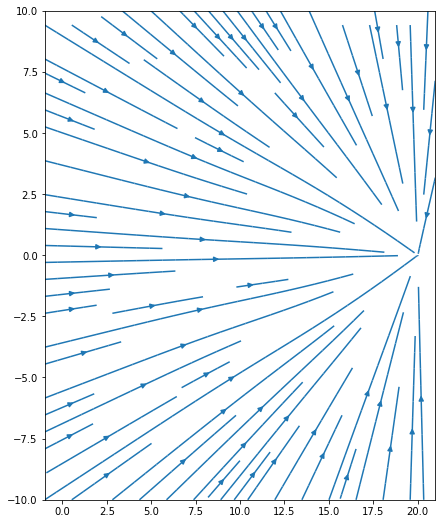

In [49]:
fig = plt.figure(figsize=(7, 9))
#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
#ax0 = fig.add_subplot(gs[0, 0])
ax0 = fig.gca()
ax0.streamplot(X, Y, U, V) #density=[0.5, 1])
#ax0.set_title('Varying Density')


In [62]:
X = np.linspace(-1,21,50)
Z = np.linspace(-1,21,50)
U = np.zeros([Z.shape[0],X.shape[0]])
V = np.zeros([Z.shape[0],X.shape[0]])

for j,x in enumerate(X):
    for i,z in enumerate(Z):
        xyz_target = xyz_target_arr(np.array([x, z, 0.0]), np.zeros(3), np.zeros(3), np.zeros(3)) - np.array([x, z, 0.0])
        U[i,j] = xyz_target[0]
        V[i,j] = xyz_target[1]

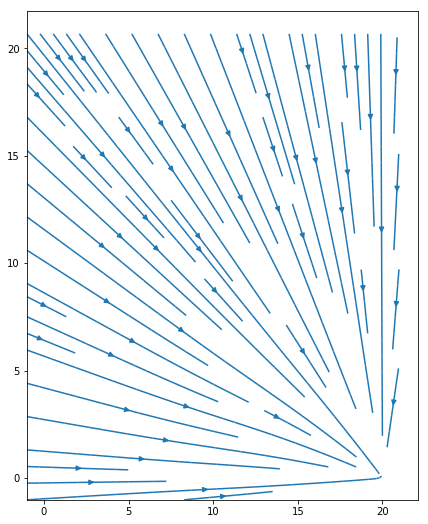

In [63]:
fig = plt.figure(figsize=(7, 9))
#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
#ax0 = fig.add_subplot(gs[0, 0])
ax0 = fig.gca()
ax0.streamplot(X, Z, U, V) #density=[0.5, 1])
#ax0.set_title('Varying Density')


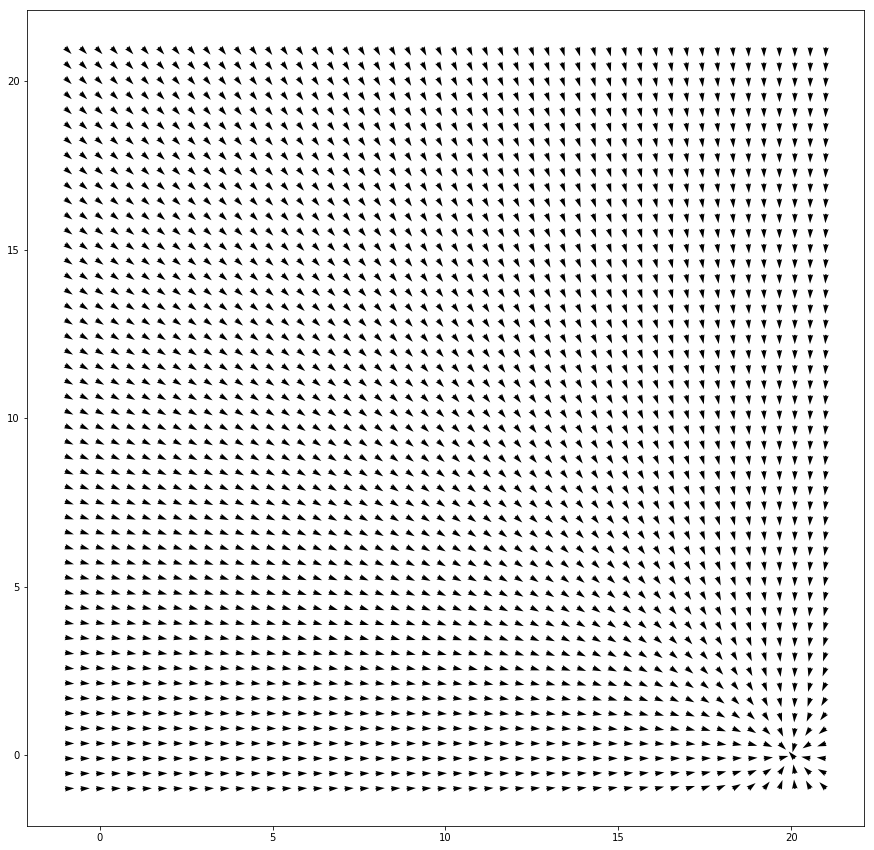

In [64]:
#X = np.arange(-10, 10, 1)
#Y = np.arange(-10, 10, 1)
#U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots(figsize=(15,15))
q = ax.quiver(X, Z, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()


In [89]:
def xyz_target_arr_fold(xyz, rpy, v_xyz, v_rpy, sigma = 10., C_b=2.0, C_o=1.0, C_g=0.1, sigma_g=1.0, alpha=1.0):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    o_direc = o_direc / np.linalg.norm(o_direc)
    
    norm_b = np.sum((xyz - b_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    norm_g = np.sum((xyz - g_xyz)**2)
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    #direc = C_b *b_direc + C_o * o_direc + C_g * g_direc
    #print("begin",b_direc, o_direc, g_direc)
    
    #return xyz + direc/ np.linalg.norm(direc) * alpha
    return b_direc, o_direc, g_direc


In [100]:
X = np.linspace(-1,21,50)
Z = np.linspace(-1,21,50)
U = np.zeros([Z.shape[0],X.shape[0],3])
V = np.zeros([Z.shape[0],X.shape[0],3])

for j,x in enumerate(X):
    for i,z in enumerate(Z):
        b_direc, o_direc, g_direc = xyz_target_arr_fold(np.array([x, 0.0, z]), np.zeros(3), np.zeros(3), np.zeros(3))
        U[i,j,:] = np.array([b_direc[0], o_direc[0], g_direc[0]])
        V[i,j,:] = np.array([b_direc[2], o_direc[2], g_direc[2]])

In [101]:
np.array([b_direc[0], o_direc[0], g_direc[0]])

array([ 6.88204873e-13, -4.75651494e-02,  0.00000000e+00])

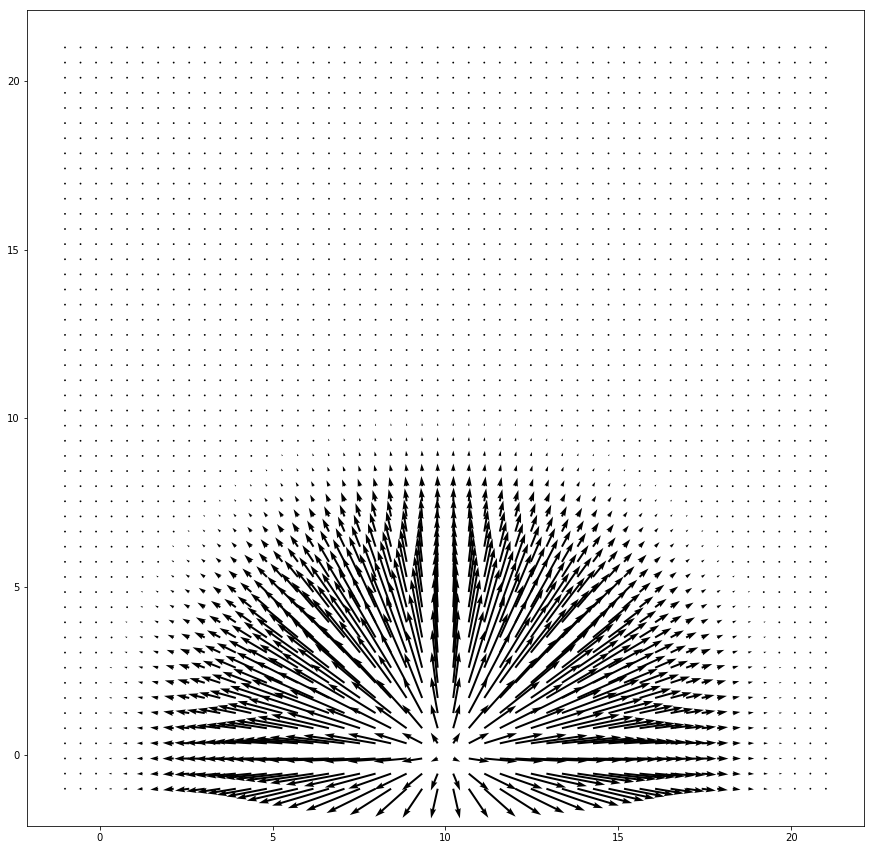

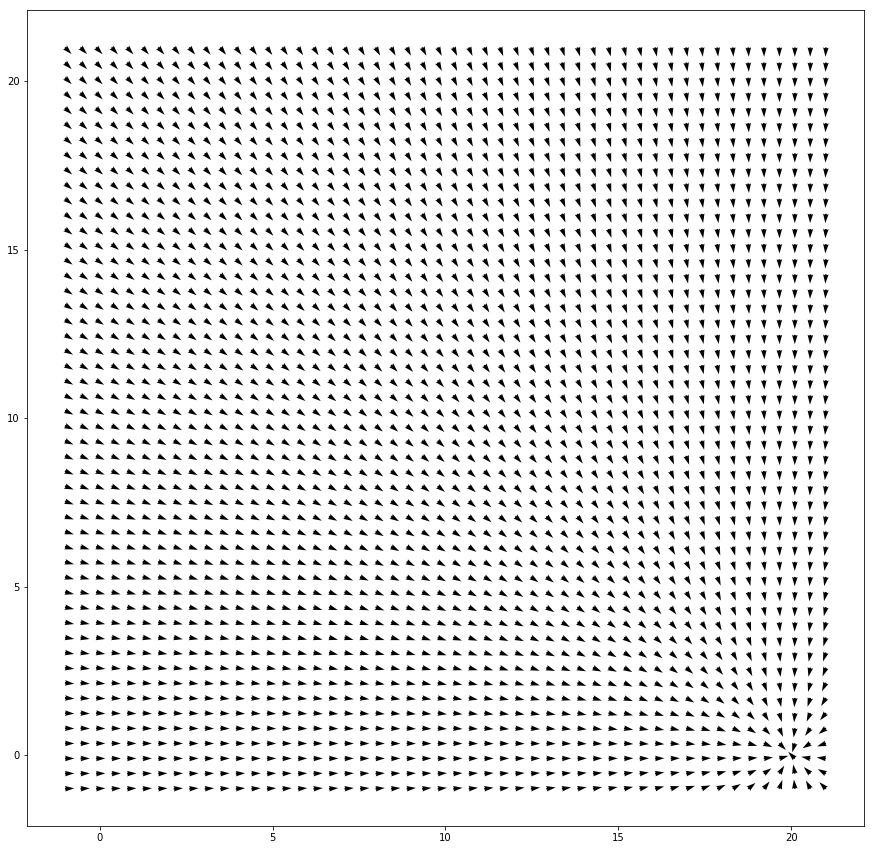

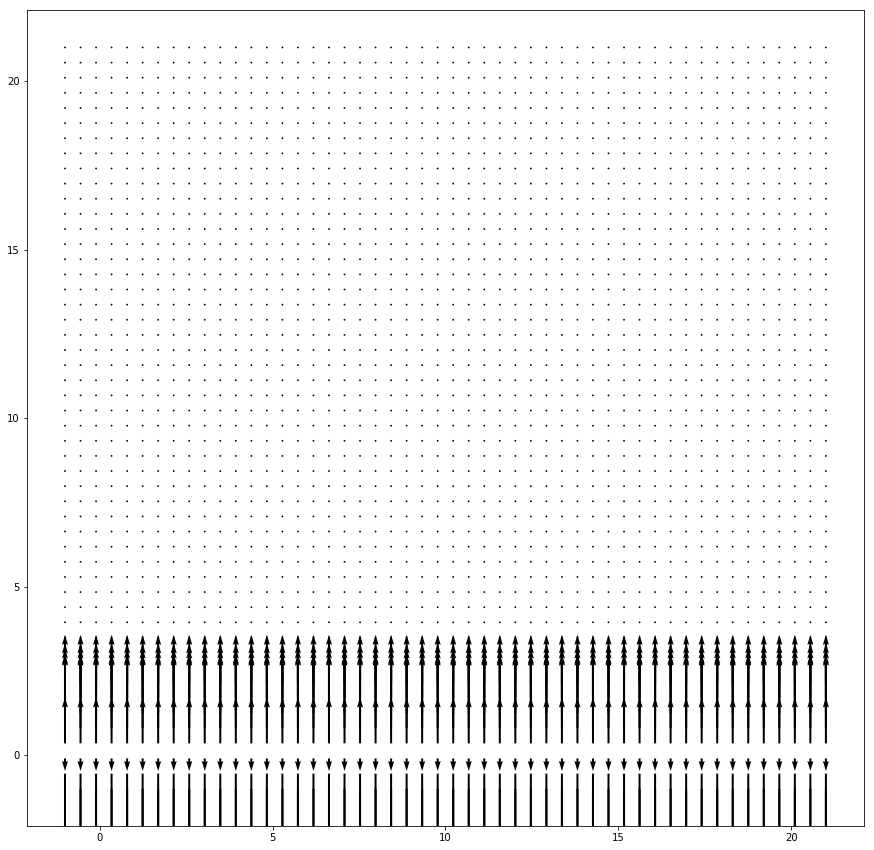

In [102]:
for idx in range(3):
    fig, ax = plt.subplots(figsize=(15,15))
    q = ax.quiver(X, Z, U[:,:,idx], V[:,:,idx])
    ax.quiverkey(q, X=0.3, Y=1.1, U=10,
                 label='Quiver key, length = 10', labelpos='E')

    plt.show()


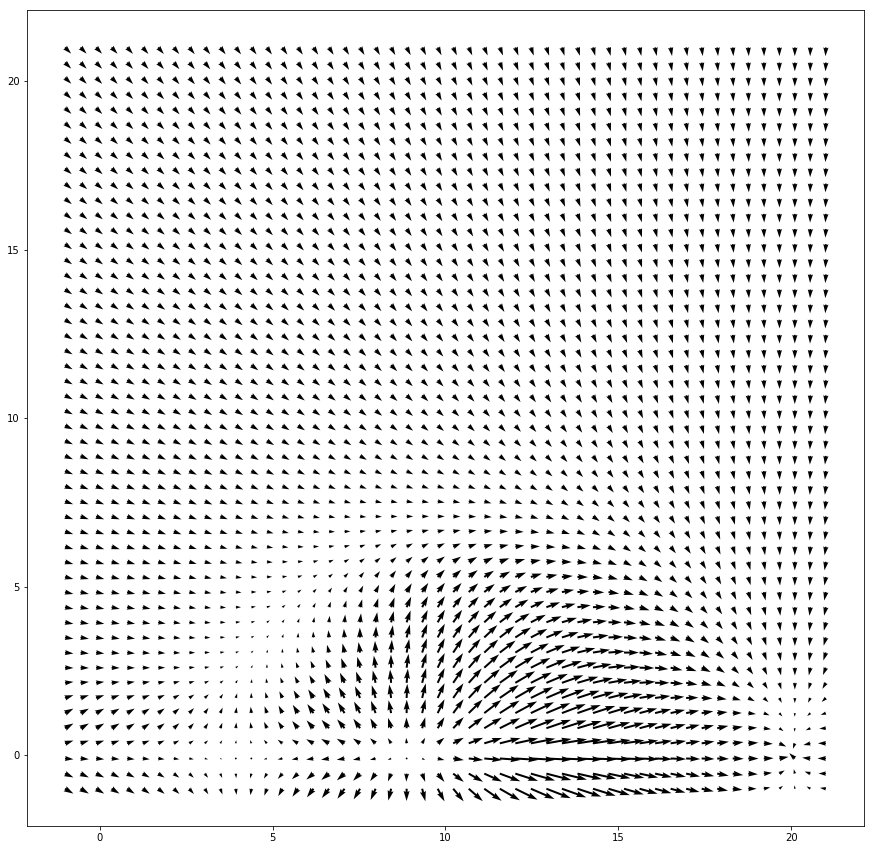

In [103]:
W = np.array([10.,1.,1.])

fig, ax = plt.subplots(figsize=(15,15))
q = ax.quiver(X, Z, U @ W, V @ W)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()


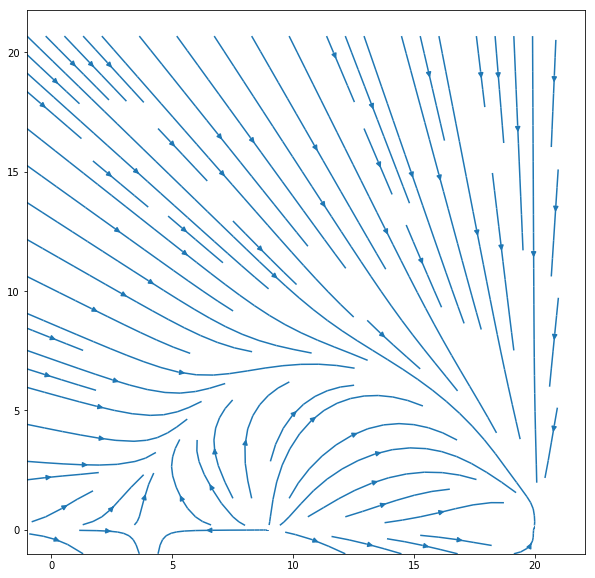

In [105]:
fig = plt.figure(figsize=(10, 10))
#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
#ax0 = fig.add_subplot(gs[0, 0])
W = np.array([10.,1.,1.0])

ax0 = fig.gca()
ax0.streamplot(X, Z, U @ W, V @ W) #density=[0.5, 1])
#ax0.set_title('Varying Density')


In [113]:
X = np.linspace(-1,21,50)
Y = np.linspace(-10,10,50)
U = np.zeros([Y.shape[0],X.shape[0],3])
V = np.zeros([Y.shape[0],X.shape[0],3])

for j,x in enumerate(X):
    for i,y in enumerate(Y):
        b_direc, o_direc, g_direc = xyz_target_arr_fold(np.array([x, y, 1.0]), np.zeros(3), np.zeros(3), np.zeros(3))
        U[i,j,:] = np.array([b_direc[0], o_direc[0], g_direc[0]])
        V[i,j,:] = np.array([b_direc[1], o_direc[1], g_direc[1]])

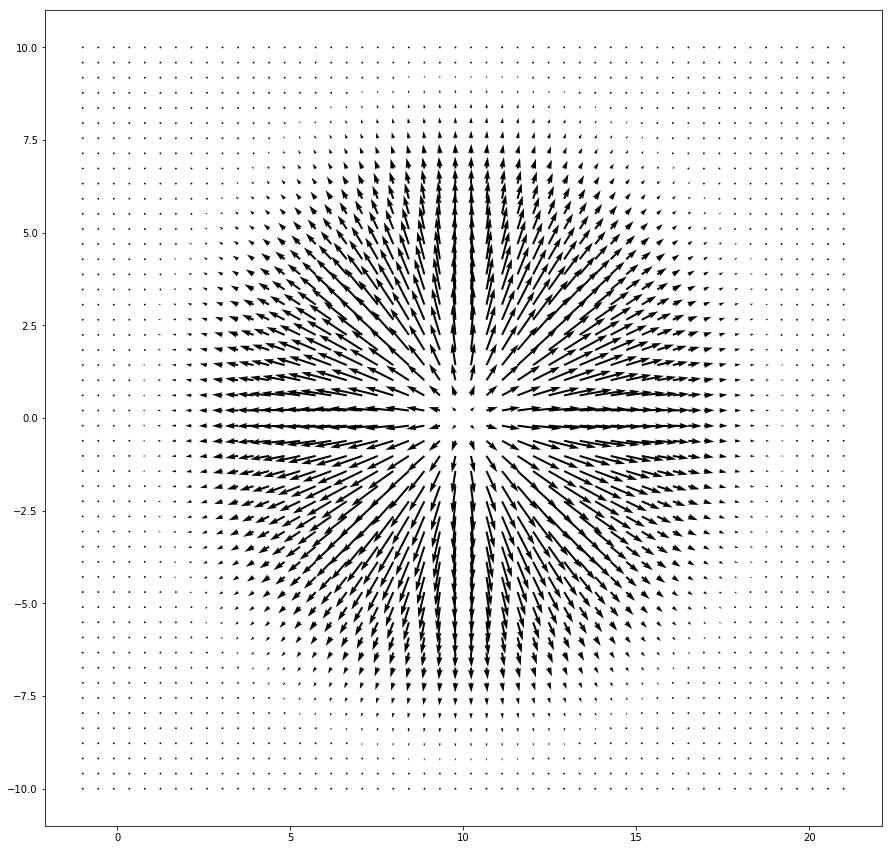

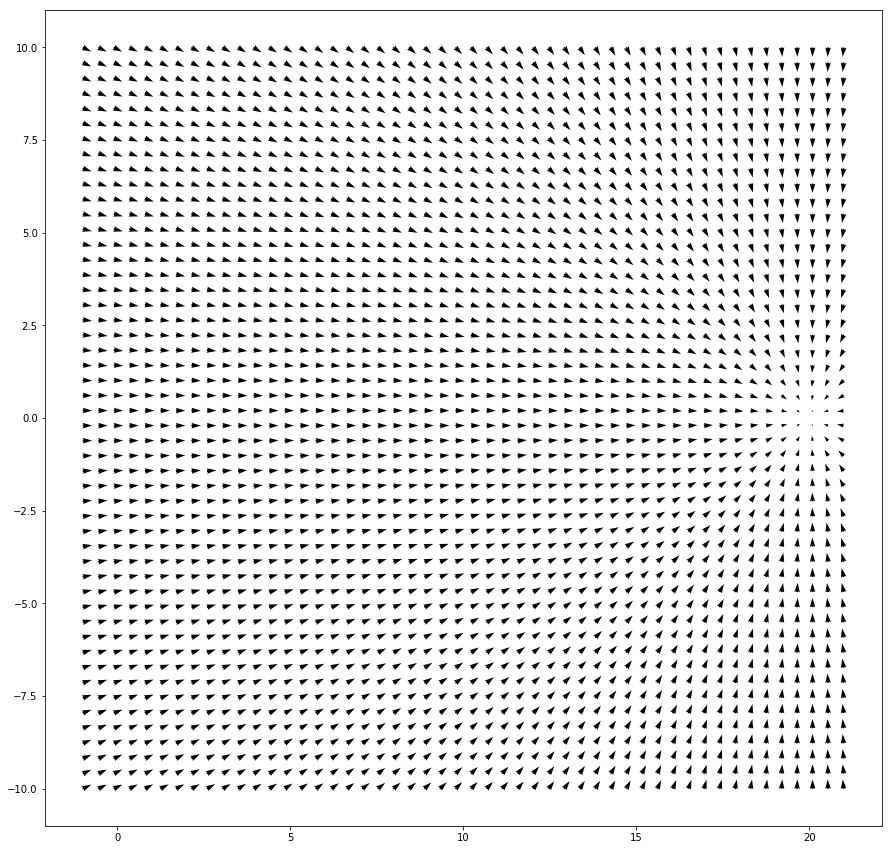

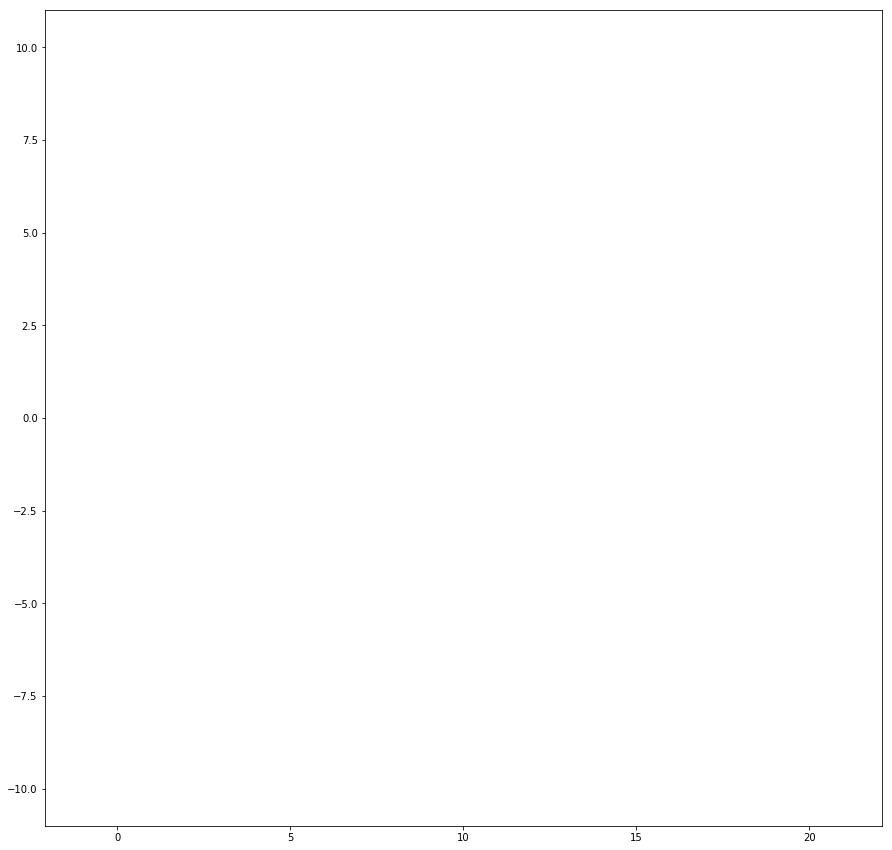

In [114]:
for idx in range(3):
    fig, ax = plt.subplots(figsize=(15,15))
    q = ax.quiver(X, Y, U[:,:,idx], V[:,:,idx])
    ax.quiverkey(q, X=0.3, Y=1.1, U=10,
                 label='Quiver key, length = 10', labelpos='E')

    plt.show()


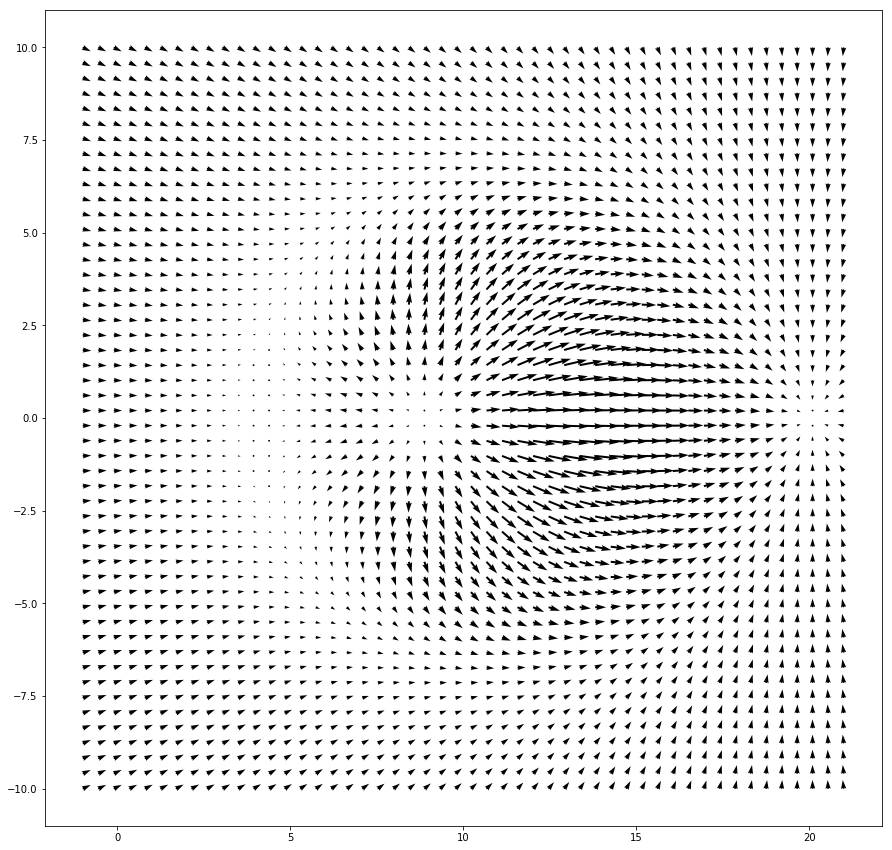

In [115]:
W = np.array([10.,1.,1.])

fig, ax = plt.subplots(figsize=(15,15))
q = ax.quiver(X, Y, U @ W, V @ W)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()


In [124]:
from mpl_toolkits.mplot3d import axes3d


In [133]:
n_sample = 10
X = np.linspace(-1,21,n_sample)
Y = np.linspace(-10,10,n_sample)
Z = np.linspace(-1,21,n_sample)

U = np.zeros([Y.shape[0],X.shape[0],Z.shape[0],3])
V = np.zeros([Y.shape[0],X.shape[0],Z.shape[0],3])
W = np.zeros([Y.shape[0],X.shape[0],Z.shape[0],3])

for j,x in enumerate(X):
    for i,y in enumerate(Y):
        for t,z in enumerate(Z):
            b_direc, o_direc, g_direc = xyz_target_arr_fold(np.array([x, y, z]), np.zeros(3), np.zeros(3), np.zeros(3))
            U[i,j,t,:] = np.array([b_direc[0], o_direc[0], g_direc[0]])
            V[i,j,t,:] = np.array([b_direc[1], o_direc[1], g_direc[1]])
            W[i,j,t,:] = np.array([b_direc[2], o_direc[2], g_direc[2]])

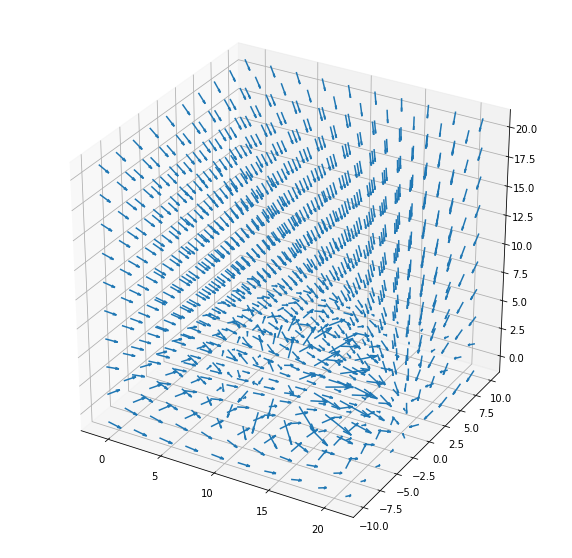

In [136]:
H = np.array([10.,1.,1.])

#fig, ax = plt.subplots(figsize=(15,15))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

XX, YY, ZZ = np.meshgrid(X,Y,Z)


q = ax.quiver(XX, YY, ZZ, U @ H, V @ H, W @H)
#ax.quiverkey(q, X=0.3, Y=1.1, U=10,
#             label='Quiver key, length = 10', labelpos='E')

plt.show()


In [135]:
U @ H, V @ H, W @H

(array([[[ 9.01861002e-01,  9.00967107e-01,  8.90417474e-01,
           8.71119989e-01,  8.44706428e-01,  8.13160554e-01,
           7.78430584e-01,  7.42198732e-01,  7.05784218e-01,
           6.70136929e-01],
         [ 8.77901583e-01,  8.76905526e-01,  8.64995299e-01,
           8.42869175e-01,  8.12622981e-01,  7.77035683e-01,
           7.38634294e-01,  6.99400137e-01,  6.60755545e-01,
           6.23629441e-01],
         [ 8.42407994e-01,  8.41452677e-01,  8.29329377e-01,
           8.05022531e-01,  7.70901586e-01,  7.31174695e-01,
           6.89273186e-01,  6.47489192e-01,  6.07263595e-01,
           5.69411726e-01],
         [ 7.93628016e-01,  7.92746012e-01,  7.80635106e-01,
           7.54199151e-01,  7.16230338e-01,  6.72700767e-01,
           6.28024183e-01,  5.84694252e-01,  5.44024157e-01,
           5.06597692e-01],
         [ 7.37676501e-01,  7.36284111e-01,  7.19206439e-01,
           6.86986150e-01,  6.44550725e-01,  5.98237298e-01,
           5.52398712e-01,  5.0930

In [147]:
def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 10., C_b=15.0, C_o=1.0, C_g=2.0, sigma_g=1.0, alpha=1.0):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    
    norm_b = np.sum((xyz - b_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    norm_g = np.sum((xyz - g_xyz)**2)
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    
    direc = C_b *b_direc + C_o * o_direc + C_g * g_direc
    #print("begin",b_direc, o_direc, g_direc)
    
    #return xyz + direc/ np.linalg.norm(direc) * alpha
    return xyz + direc * alpha


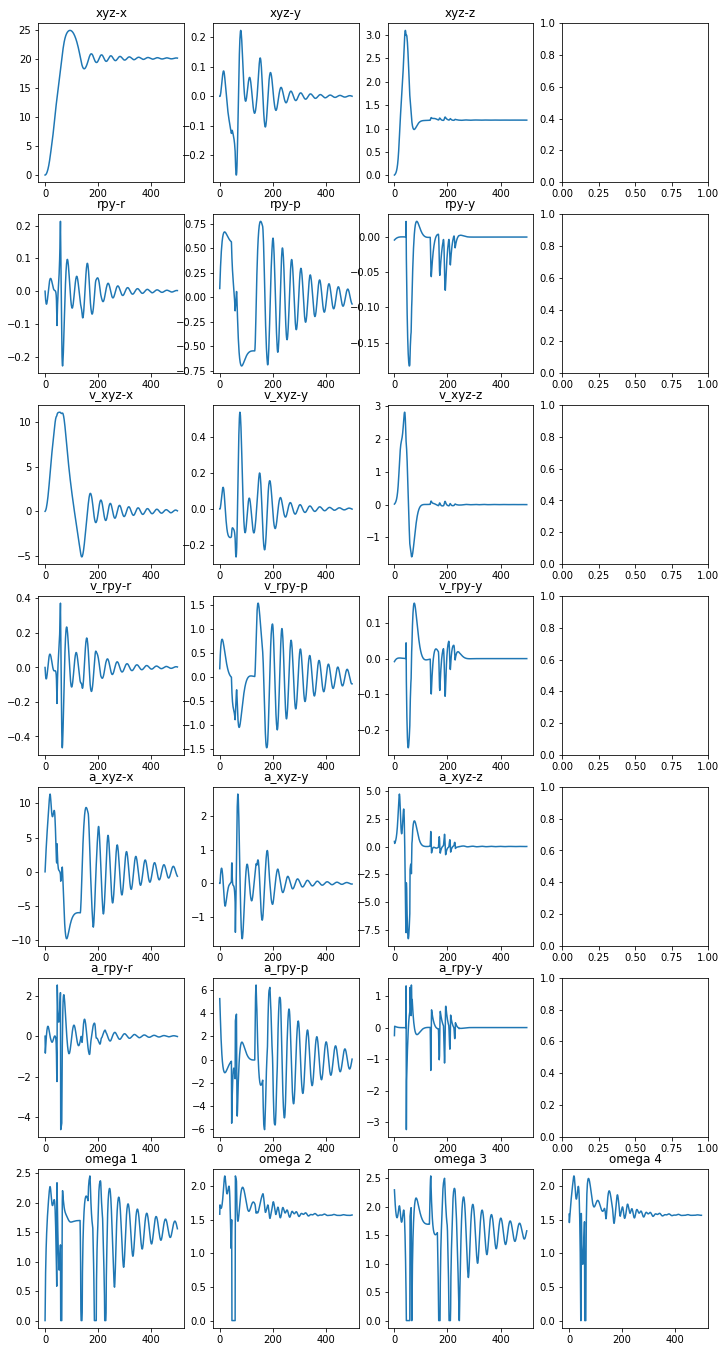

In [150]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500



#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=length)
plot_pretty(res)